# Project 3 - Purely Subsonic


In [182]:
import numpy as np
from utils import *

In [194]:
Nx = 101
x = np.linspace(0, 3, Nx)
dx = x[1] - x[0]
gamma = 1.4
CFL = 0.4
R = 287.0

In [195]:
P = np.ones(Nx)
T = np.ones(Nx)
rho = P / (R * T)
v = np.ones(Nx) *  0.4
A = 1 + 2.2 * (x - 1.5)**2
Mach_no = v / np.sqrt(T)
P_back = 0.78

In [196]:
Q1 = rho * A
Q2 = rho * A * v
Q3 = rho * A * (T / (gamma - 1) + (gamma / 2) * v ** 2)

In [197]:
def subsonicIBC():
    Q1[0] = 2* Q1[1] - Q1[2]
    Q2[0] = 2 * Q2[1] - Q2[2]
    
    v = Q2/Q1
    Q3[0] = Q1[0] * (1 / (gamma - 1) + (gamma / 2) * v[0]**2)  

    Q2[-1] = 2 * Q2[-2] - Q2[-3]
    Q1[-1] = 2 * Q1[-2] - Q1[-3]
    Q3[-1] = (P_back * A[-1] /( R * (gamma - 1))) + (gamma / 2) * Q2[-1] * v[-1]

In [198]:
P, rho, v,T, Mach_no = mac_cormac(rho,A,v,T,Mach_no,P,Q1,Q2,Q3,gamma, CFL, Nx, dx, subsonicIBC)

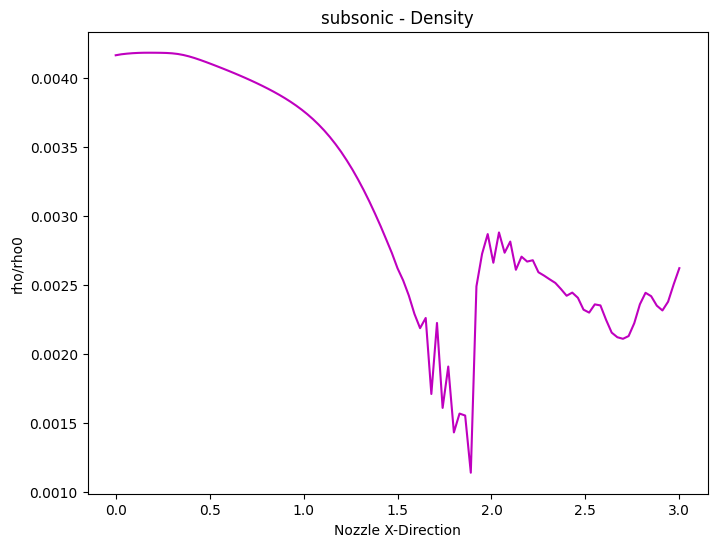

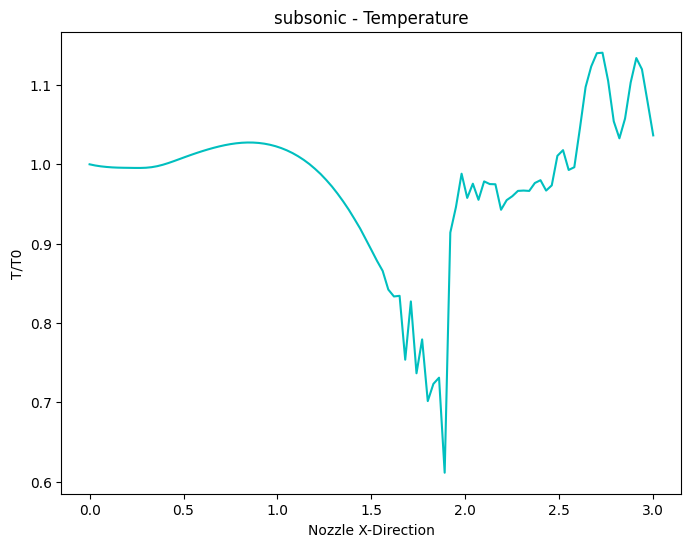

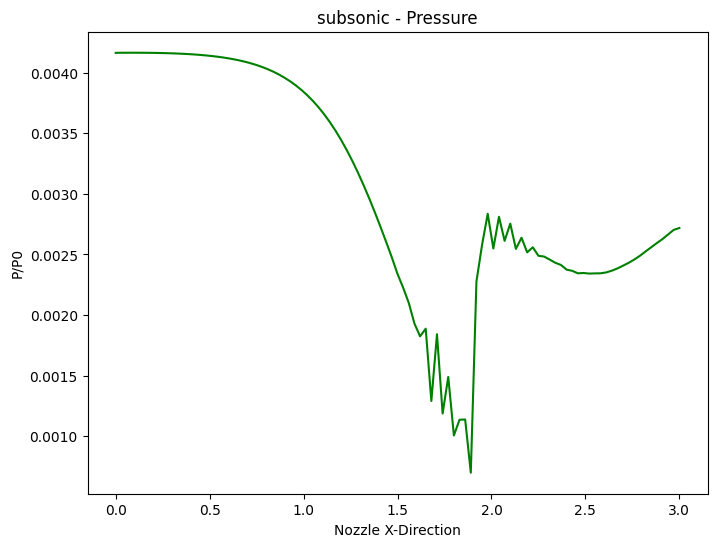

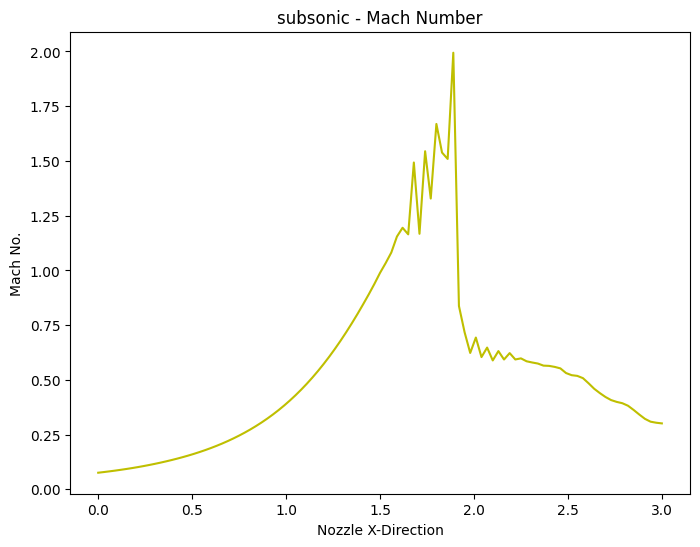

In [199]:
generate_plots(P,x,rho,v,T,Mach_no, "subsonic")